In [1]:
import Inflow
from ResearchProjects import adaptation
from ResearchProjects.adaptation.pipelines import pipelines
import pandas as pd, one, numpy as np
import matplotlib.pyplot as plt

In [2]:
connector = one.ONE(data_access_mode = "remote")
session = connector.search(id = r"wm30/2023-08-28/003", details = True, no_cache = True)
session

Loading session details: 100%|███████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.71s/it]


subject                                                                      wm30
users                                                                [wilsonmena]
location                                                 Fernbach - 2p stim setup
procedures                                                   [Two photon Imaging]
lab                                                                      HaissLab
projects                                                             [Adaptation]
type                                                                         None
task_protocol                                                                    
number                                                                          3
start_time                                              2023-08-28T18:31:02+02:00
end_time                                                                     None
narrative                       - Vgat#27 / wm#30_20230828\r\nFolder 003:\r\n-...
parent_session  

In [46]:
print(session.path)

\\cajal\cajal_data2\ONE\Adaptation\wm30\2023-08-28\003


In [3]:
suite2p_data = pipelines.suite2p.run.load(session)

In [4]:
neuropil_masks = pipelines.neuropil_mask.separation.load(session)

In [5]:
trials_roi_df = pipelines.trials_roi_df.sync.generate(session)

In [6]:
resp_df = pipelines.responsiveness_df.initial_calculation.load(session)

In [51]:
neuropil_masks = pipelines.neuropil_mask.refinement.save(session, neuropil_masks["Delta"], extra = "Delta")

In [194]:
rois_df = pipelines.rois_df.signal_quantif.generate(session, refresh = True)

LOAD_INFO : gen.rois_df.signal_quantif        : <wm33/2023-12-20/001> Performing the computation to generate rois_df.signal_quantif - 2024-01-25 18:09:38


In [7]:
rois_df = pipelines.rois_df.signal_quantif.load(session)

In [8]:
traces = trials_roi_df[trials_roi_df.in_C1 & trials_roi_df.is_VGAT & (trials_roi_df.complete_stim == "C1_10_90&B1_0")].F_norm_sync.groupby("roi#").mean()
traces = traces.loc[traces.apply(lambda x: x.isec[0.65:1.5].mean()).sort_values().index]

accuracies = resp_df.loc[(traces.index,"change_early"),].grp.filter(in_target_barrel = True, nontarget_amplitude = "0", frequency_change = 80.0, method = "classifier").average_score_acc_balanced
accuracies.index = accuracies.index.get_level_values("roi#")

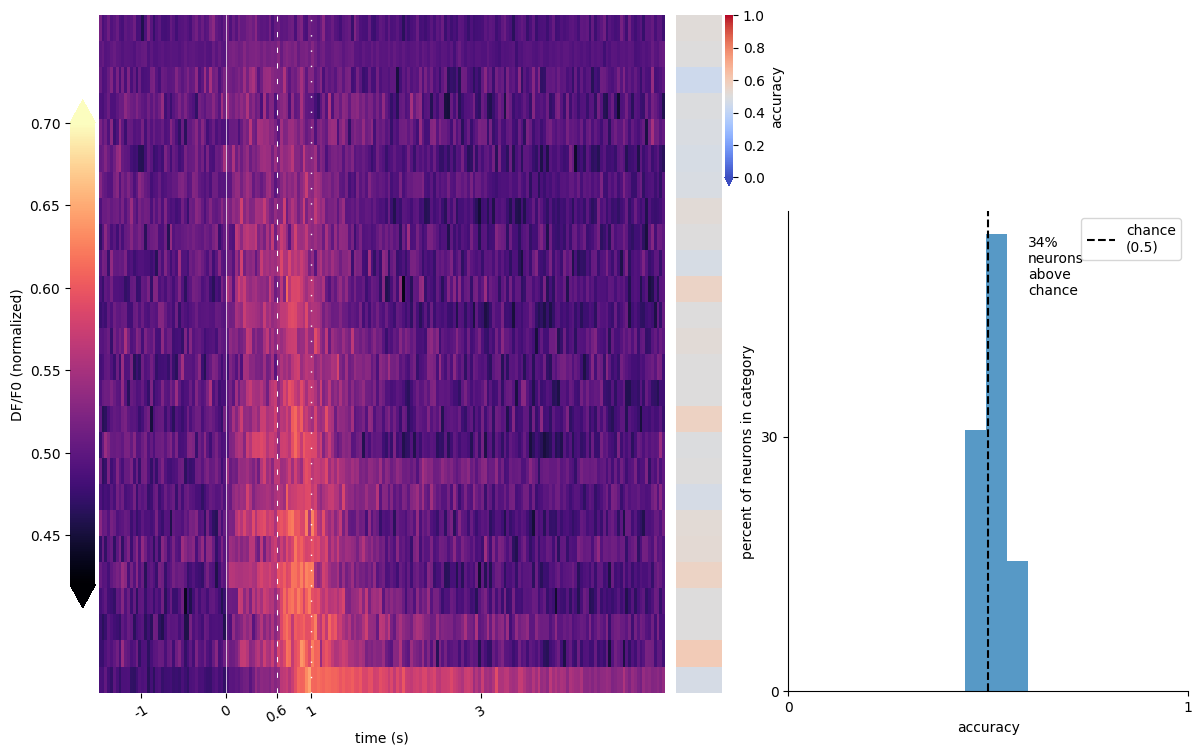

In [12]:
Inflow.plots.custom.make_traces_heatmap(traces, conditions = {}, close_plot = False, neuron_values = accuracies, acc_vmin = 0, acc_vmax = 1, chance = 0.5)

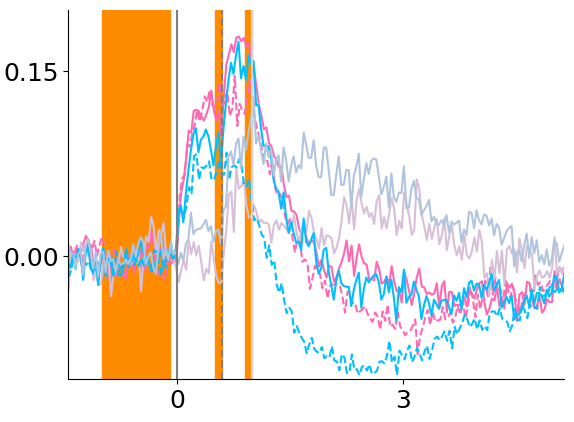

In [49]:
a = ( trials_roi_df[trials_roi_df.in_C1 & (trials_roi_df.complete_stim == "C1_10_90&B1_0")].F_norm_sync.mean() - 0.5 ) * 4
a = a - a.isec[-1:0.1].mean()
ac = ( trials_roi_df[trials_roi_df.in_C1 & (trials_roi_df.complete_stim == "C1_10&B1_0")].F_norm_sync.mean() - 0.5 ) * 4 
ac = ac - ac.isec[-1:0.1].mean()

b = ( trials_roi_df[trials_roi_df.in_C1 &(trials_roi_df.complete_stim == "C1_10_90&B1_10")].F_norm_sync.mean() - 0.5 ) * 4
b = b - b.isec[-1:0.1].mean()
bc = ( trials_roi_df[trials_roi_df.in_C1 & ((trials_roi_df.complete_stim == "B1_10&C1_10") | (trials_roi_df.complete_stim == "C1_10&B1_10"))].F_norm_sync.mean() - 0.5) * 4
bc = bc - bc.isec[-1:0.1].mean()

plt.plot(*(a-a.isec[-1:0.1].mean()).pack, color = "hotpink", ls = "-")
plt.plot(*(ac-ac.isec[-1:0.1].mean()).pack, color = "hotpink", ls = "--")

plt.plot(*(a - ac).pack, color = "thistle")


plt.plot(*(b-b.isec[-1:0.1].mean()).pack, color = "deepskyblue", ls = "-")
plt.plot(*(bc-bc.isec[-1:0.1].mean()).pack, color = "deepskyblue", ls = "--")

plt.plot(*(b - bc).pack, color = "lightsteelblue")

plt.axvline(0, color = "gray")
plt.axvline(0.6, color = "gray", ls = '--')
plt.axvline(1, color = "lightgray", ls = '-')

plt.axvspan(-1,-0.1, color = "darkorange")
plt.axvspan(0.5,0.6, color = "darkorange")
plt.axvspan(0.9,1, color = "darkorange")

plt.xlim(-1.45, 5.15)
plt.ylim(-0.1, 0.2)
Inflow.plots.utils.clarify_plot_ax(plt.gca())
Inflow.plots.utils.save_session_fig(plt.gcf(),"substraction_traces",extra="all.C1.neurons.stim.C1", session_details = session)

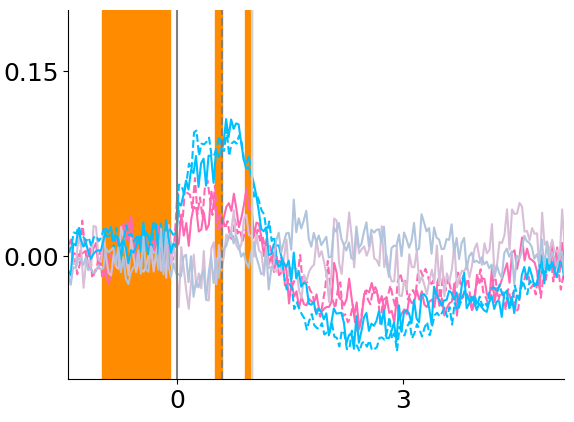

In [50]:
a = ( trials_roi_df[trials_roi_df.in_C1 & (trials_roi_df.complete_stim == "B1_10_90&C1_0")].F_norm_sync.mean() - 0.5 ) * 4
ac = ( trials_roi_df[trials_roi_df.in_C1 & (trials_roi_df.complete_stim == "B1_10&C1_0")].F_norm_sync.mean() - 0.5 ) * 4 

b = ( trials_roi_df[trials_roi_df.in_C1 &(trials_roi_df.complete_stim == "B1_10_90&C1_10")].F_norm_sync.mean() - 0.5 ) * 4
bc = ( trials_roi_df[trials_roi_df.in_C1 & ((trials_roi_df.complete_stim == "B1_10&C1_10") | (trials_roi_df.complete_stim == "C1_10&B1_10"))].F_norm_sync.mean() - 0.5) * 4

plt.plot(*a.pack, color = "hotpink", ls = "-")
plt.plot(*ac.pack, color = "hotpink", ls = "--")

plt.plot(*(a - ac).pack, color = "thistle")


plt.plot(*b.pack, color = "deepskyblue", ls = "-")
plt.plot(*bc.pack, color = "deepskyblue", ls = "--")

plt.plot(*(b - bc).pack, color = "lightsteelblue")

plt.axvline(0, color = "gray")
plt.axvline(0.6, color = "gray", ls = '--')
plt.axvline(1, color = "lightgray", ls = '-')

plt.axvspan(-1,-0.1, color = "darkorange")
plt.axvspan(0.5,0.6, color = "darkorange")
plt.axvspan(0.9,1, color = "darkorange")

plt.xlim(-1.45, 5.15)
plt.ylim(-0.1, 0.2)
Inflow.plots.utils.clarify_plot_ax(plt.gca())
Inflow.plots.utils.save_session_fig(plt.gcf(),"substraction_traces",extra="all.C1.neurons.stim.B1", session_details = session)

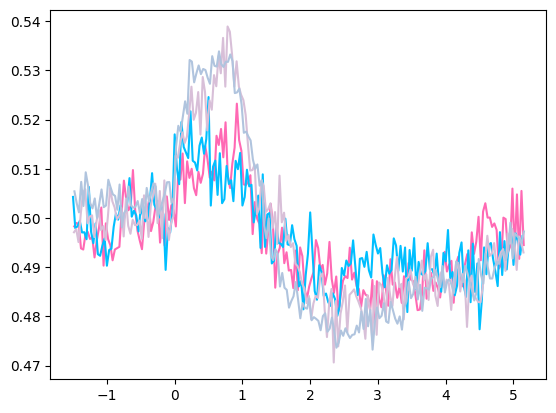

In [346]:
plt.plot(*trials_roi_df[trials_roi_df.in_C1 & trials_roi_df.is_VGAT & (trials_roi_df.complete_stim == "B1_10_90&C1_0")].F_norm_sync.mean().pack, color = "hotpink")
plt.plot(*trials_roi_df[trials_roi_df.in_C1 & trials_roi_df.is_VGAT & (trials_roi_df.complete_stim == "B1_10&C1_0")].F_norm_sync.mean().pack, color = "deepskyblue")

plt.plot(*trials_roi_df[trials_roi_df.in_C1 & trials_roi_df.is_VGAT & (trials_roi_df.complete_stim == "B1_10_90&C1_10")].F_norm_sync.mean().pack, color = "thistle")
plt.plot(*trials_roi_df[trials_roi_df.in_C1 & trials_roi_df.is_VGAT & ((trials_roi_df.complete_stim == "B1_10&C1_10") | (trials_roi_df.complete_stim == "C1_10&B1_10"))].F_norm_sync.mean().pack, color = "lightsteelblue")

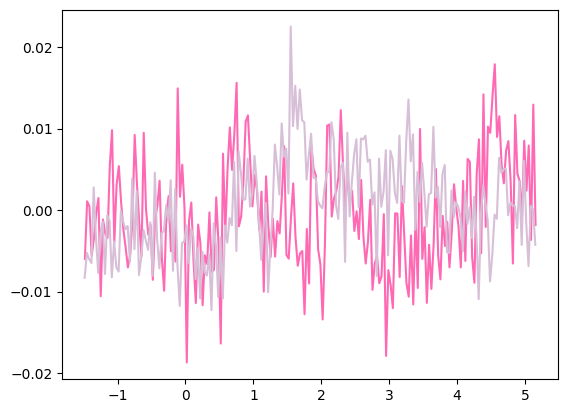

In [347]:
a = trials_roi_df[trials_roi_df.in_C1 & trials_roi_df.is_VGAT & (trials_roi_df.complete_stim == "B1_10_90&C1_0")].F_norm_sync.mean()
b = trials_roi_df[trials_roi_df.in_C1 & trials_roi_df.is_VGAT & (trials_roi_df.complete_stim == "B1_10&C1_0")].F_norm_sync.mean()
plt.plot(*(a - b).pack, color = "hotpink")

a = trials_roi_df[trials_roi_df.in_C1 & trials_roi_df.is_VGAT & (trials_roi_df.complete_stim == "B1_10_90&C1_10")].F_norm_sync.mean()
b = trials_roi_df[trials_roi_df.in_C1 & trials_roi_df.is_VGAT & ((trials_roi_df.complete_stim == "B1_10&C1_10") | (trials_roi_df.complete_stim == "C1_10&B1_10"))].F_norm_sync.mean()
plt.plot(*(a - b).pack, color = "thistle")

In [79]:
rois_df.loc[56] # non VGAT (excit) in Delta
rois_df.loc[106] # VGAT (inhib) in Delta
rois_df.loc[79] # ou 87 non VGAT (excit) in Gamma
rois_df.loc[64] # VGAT (inhib) in Gamma

rois_df.loc[57] # ou 86 non VGAT (excit) in no barrel
rois_df.loc[103] # ou 164 VGAT (inhib) in no barrel

ypix                           [186, 186, 187, 187, 187, 187, 188, 188, 188, ...
xpix                           [327, 328, 326, 327, 328, 329, 325, 326, 327, ...
lam                            [0.6173179, 0.62866235, 0.46953565, 0.77527547...
med                                                                   [193, 329]
footprint                                                                      1
mrs                                                                     1.611383
mrs0                                                                    3.755783
compact                                                                 1.029888
solidity                                                                1.156069
npix                                                                         105
npix_soma                                                                    100
soma_crop                      [False, False, True, True, True, True, True, T...
overlap                     

In [99]:
timelines = pipelines.timelines_dict.load(session)
timelines = pd.Series(timelines).sort_index()

In [237]:
all_timelines = np.array([])
stims_times = [0]
stims_states = [0]
offset = 0
for value in timelines:
    shift_values = value - value.min()
    shift_values = shift_values + offset

    all_timelines = np.concatenate((all_timelines, shift_values))
    
    stims_times.append(offset - value.min())
    stims_times.append(offset - value.min() + 1)    

    stims_states.append(0)
    stims_states.append(0.4)
    
    offset = shift_values.max() + np.diff(shift_values).mean()

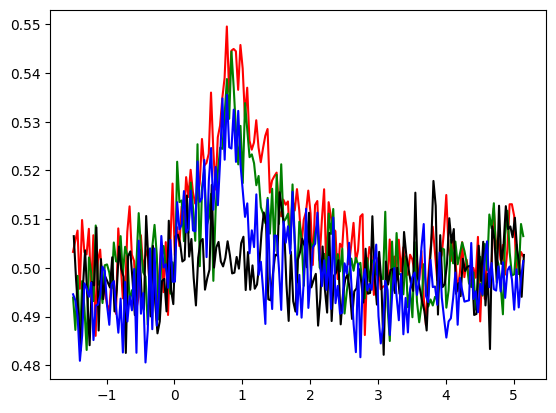

In [267]:
plt.plot(*trials_roi_df[trials_roi_df.in_Gamma & trials_roi_df.is_VGAT & (trials_roi_df.complete_stim == "Gamma_10_90&Delta_0")].F_norm_sync.mean().pack, color = "red")
plt.plot(*trials_roi_df[trials_roi_df.in_Gamma & trials_roi_df.is_VGAT & (trials_roi_df.complete_stim == "Gamma_10_90&Delta_10")].F_norm_sync.mean().pack, color = "green")

plt.plot(*trials_roi_df[trials_roi_df.in_Gamma & trials_roi_df.is_VGAT & (trials_roi_df.complete_stim == "Delta_10_90&Gamma_0")].F_norm_sync.mean().pack, color = "black")
plt.plot(*trials_roi_df[trials_roi_df.in_Gamma & trials_roi_df.is_VGAT & (trials_roi_df.complete_stim == "Delta_10_90&Gamma_10")].F_norm_sync.mean().pack, color = "blue")

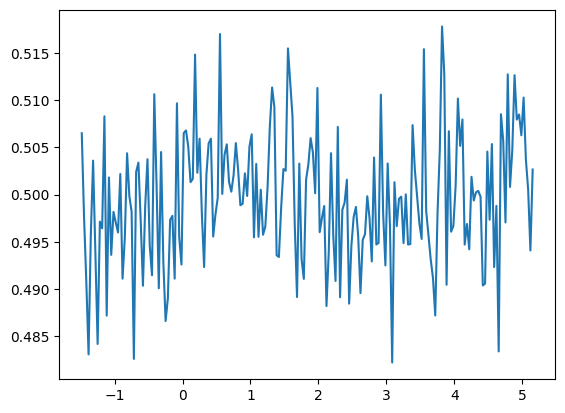

In [225]:
plt.plot(*trials_roi_df[trials_roi_df.in_Gamma & trials_roi_df.is_VGAT & (trials_roi_df.complete_stim == "Delta_10_90&Gamma_0")].F_norm_sync.mean().pack)

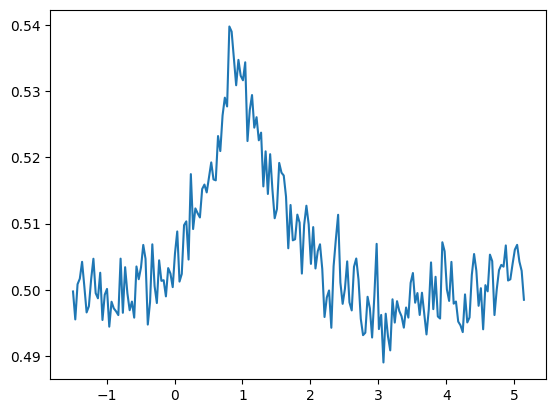

In [222]:
plt.plot(*trials_roi_df[trials_roi_df.in_Gamma & ~trials_roi_df.is_VGAT & (trials_roi_df.complete_stim == "Gamma_10_90&Delta_0")].F_norm_sync.mean().pack)

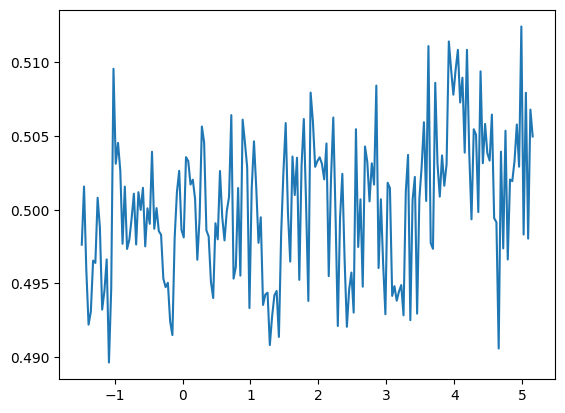

In [228]:
plt.plot(*trials_roi_df[trials_roi_df.in_Gamma & ~trials_roi_df.is_VGAT & (trials_roi_df.complete_stim == "Delta_10_90&Gamma_0")].F_norm_sync.mean().pack)

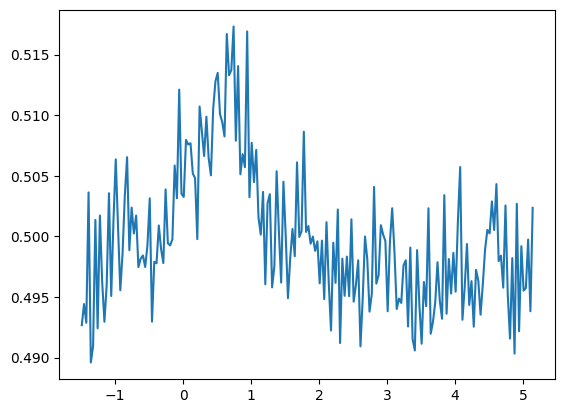

In [229]:
plt.plot(*trials_roi_df[trials_roi_df.in_Gamma & ~trials_roi_df.is_VGAT & (trials_roi_df.complete_stim == "Delta_10_90&Gamma_10")].F_norm_sync.mean().pack)

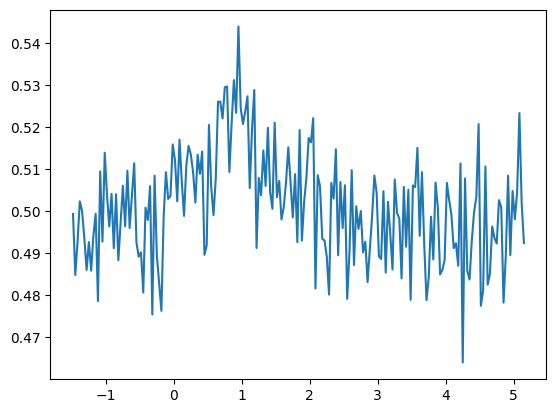

In [223]:
plt.plot(*trials_roi_df[trials_roi_df.in_Delta & trials_roi_df.is_VGAT & (trials_roi_df.complete_stim == "Delta_10_90&Gamma_0")].F_norm_sync.mean().pack)

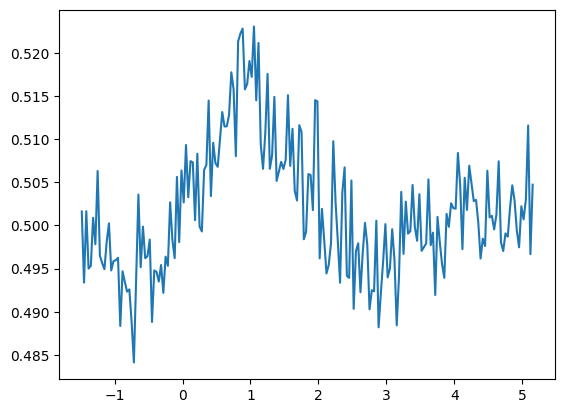

In [224]:
plt.plot(*trials_roi_df[trials_roi_df.in_Delta & ~trials_roi_df.is_VGAT & (trials_roi_df.complete_stim == "Delta_10_90&Gamma_0")].F_norm_sync.mean().pack)

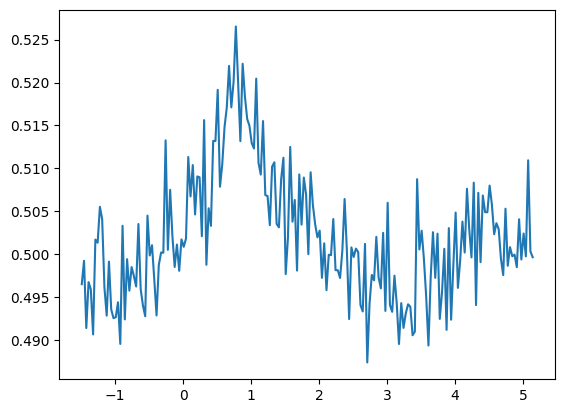

In [230]:
plt.plot(*trials_roi_df[trials_roi_df.in_Delta & ~trials_roi_df.is_VGAT & (trials_roi_df.complete_stim == "Delta_10_90&Gamma_10")].F_norm_sync.mean().pack)

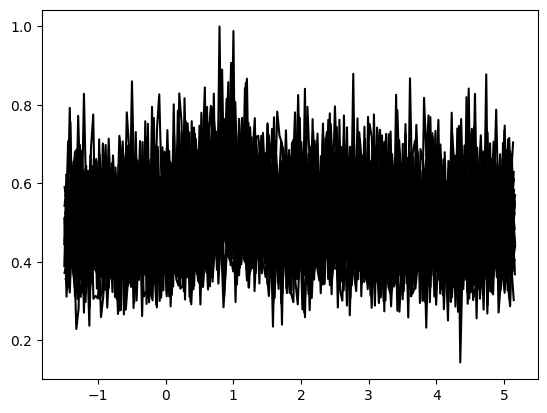

In [248]:
for item in trials_roi_df[trials_roi_df.in_Gamma & trials_roi_df.is_VGAT & (trials_roi_df.complete_stim == "Gamma_10_90&Delta_0")].loc[80].F_norm_sync :
    plt.plot(*item.pack, color = "k")

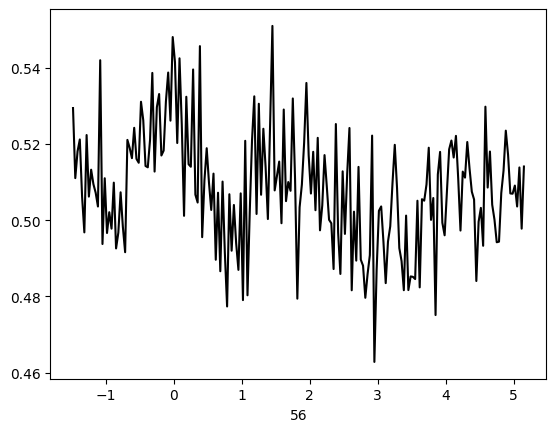

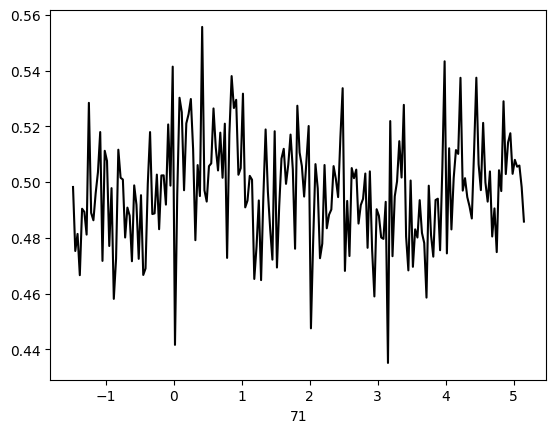

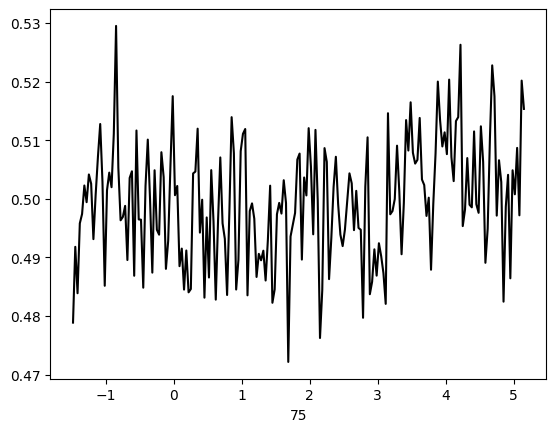

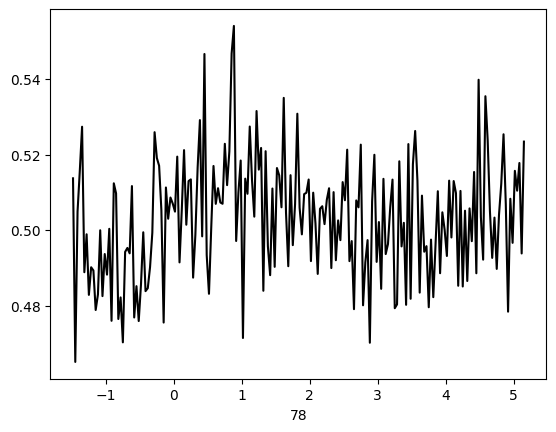

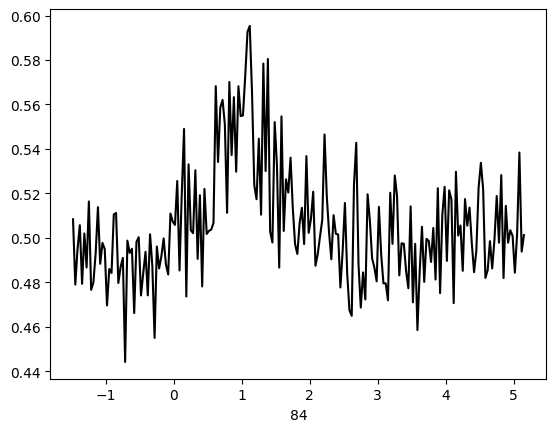

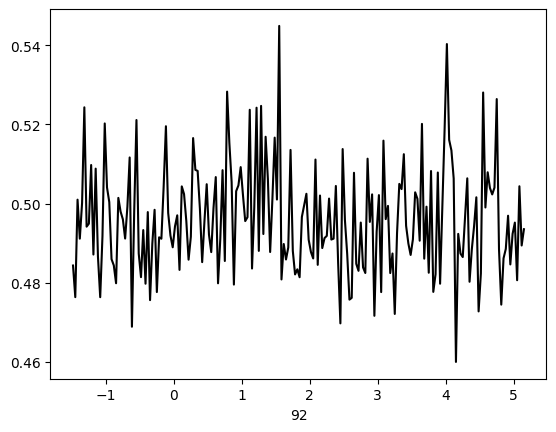

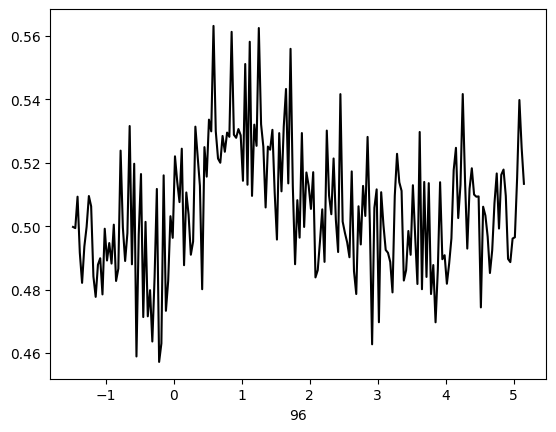

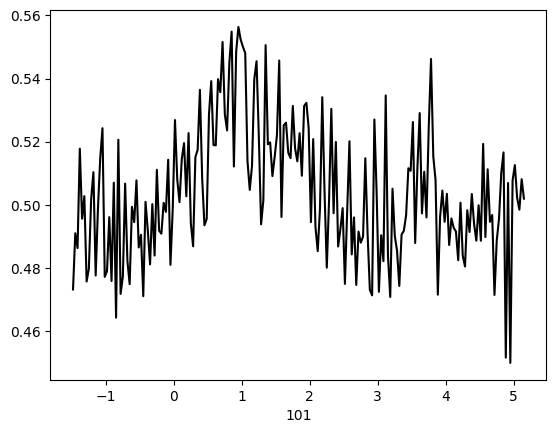

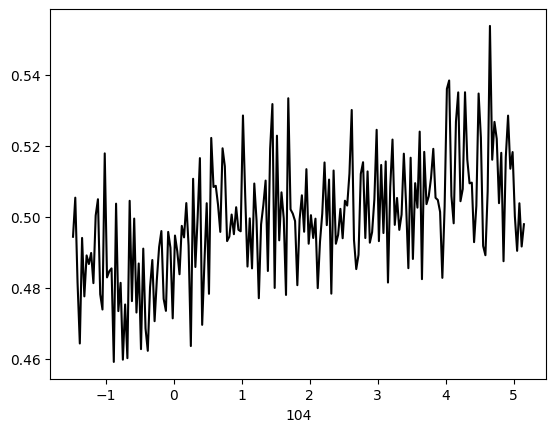

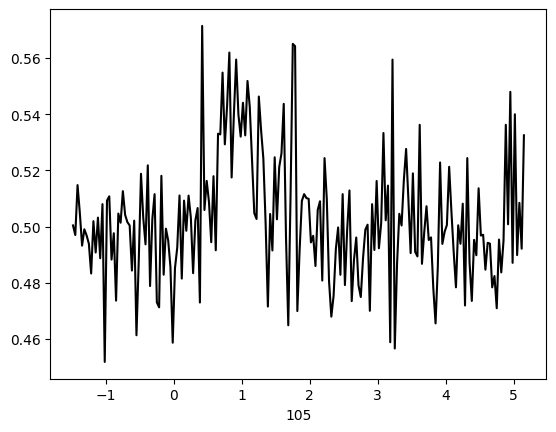

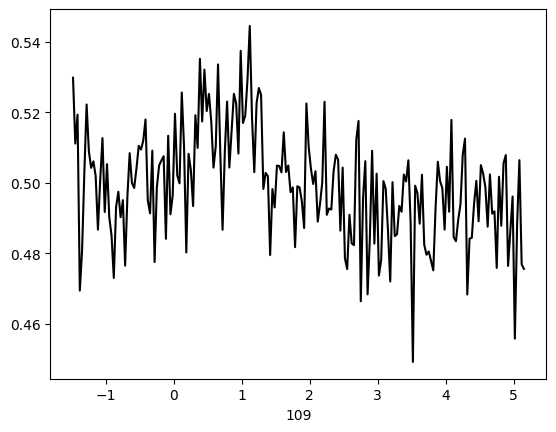

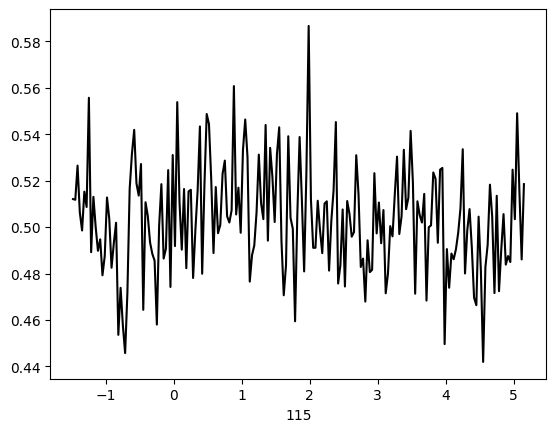

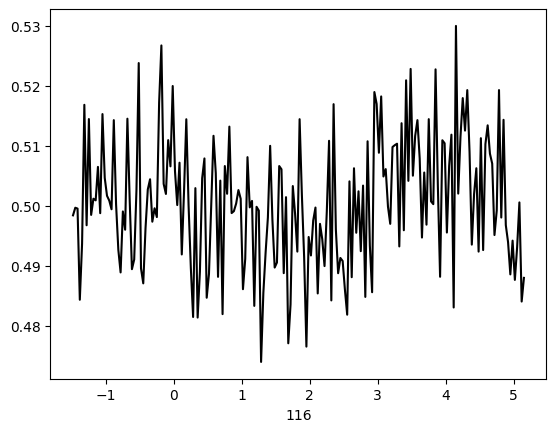

In [262]:
#[plt.plot(*item.pack, color = "gray") for item in trials_roi_df[trials_roi_df.in_Gamma & trials_roi_df.is_VGAT & (trials_roi_df.complete_stim == "Gamma_10_90&Delta_0")].F_norm_sync]
for roi_no, item in trials_roi_df[trials_roi_df.in_Delta & ~trials_roi_df.is_VGAT & (trials_roi_df.complete_stim == "Delta_10_90&Gamma_0")].F_norm_sync.groupby("roi#").mean().items() :
    plt.figure()
    plt.plot(*item.pack, color = "k")
    plt.xlabel(str(roi_no))

(0.0, 1500.0)

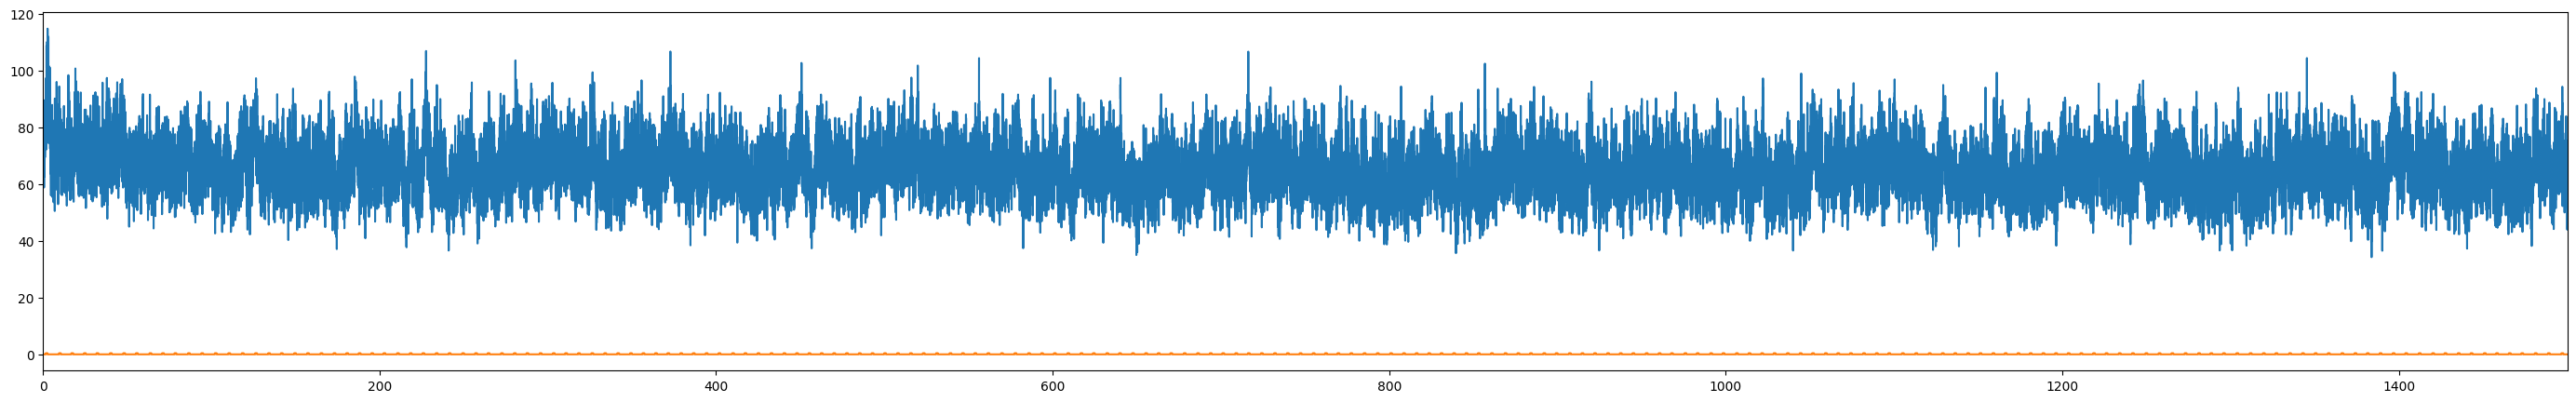

In [259]:
plt.figure(figsize = (35,5))
plt.plot(all_timelines, rois_df.loc[35].Fneu)
plt.step(stims_times,stims_states)
plt.xlim(0, 1500)

44
53
60
62
63
64
69
80
89


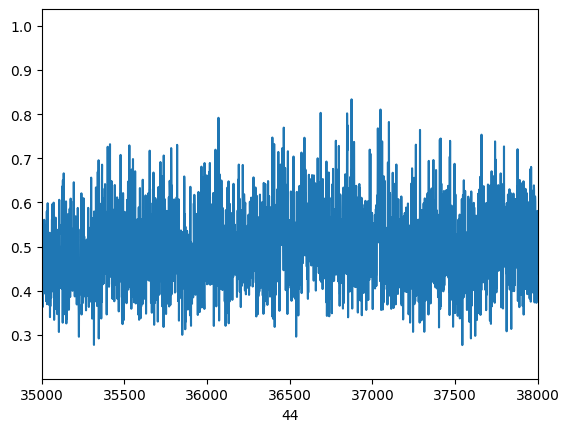

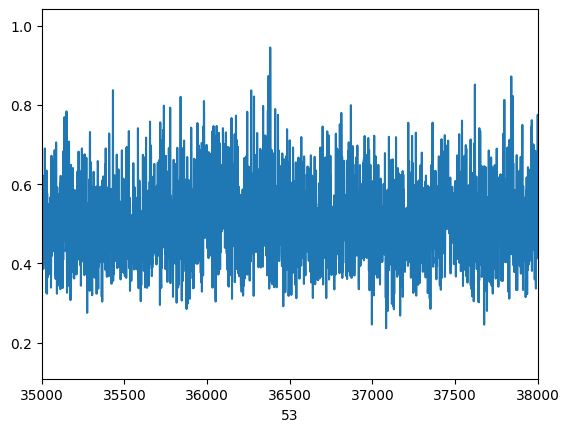

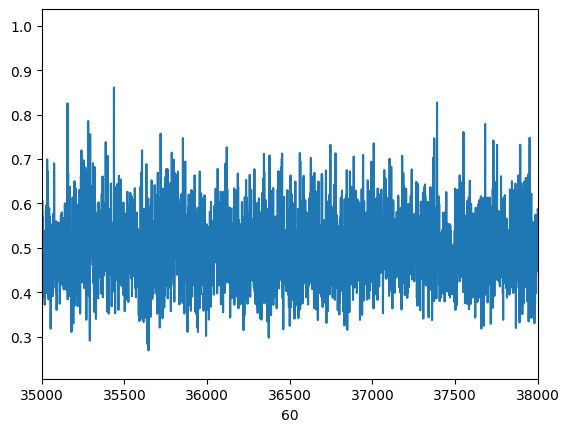

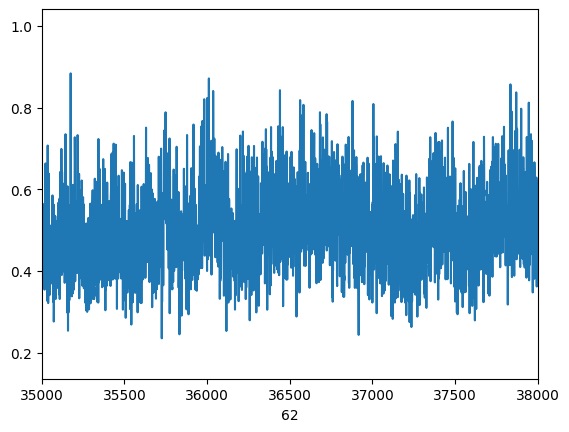

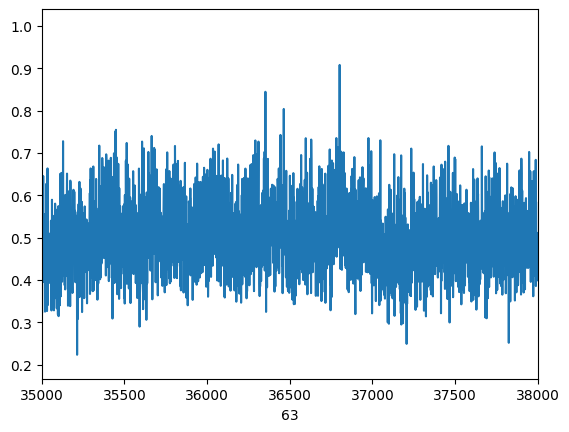

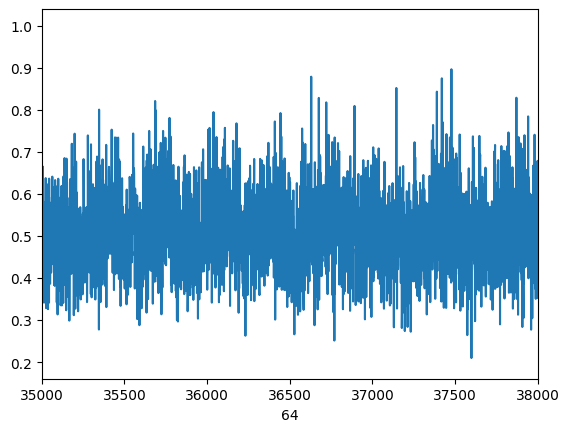

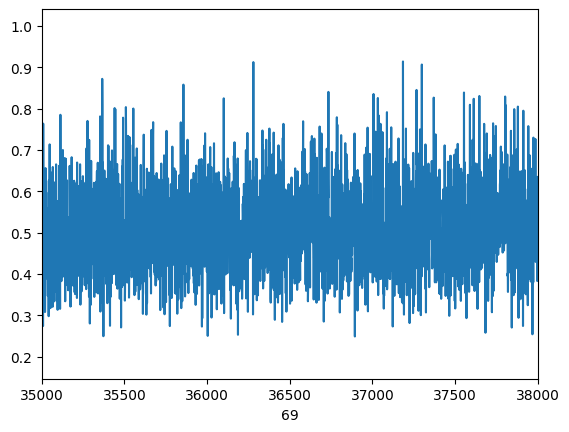

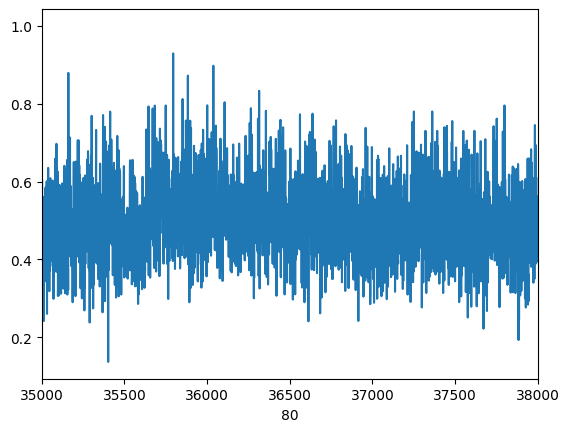

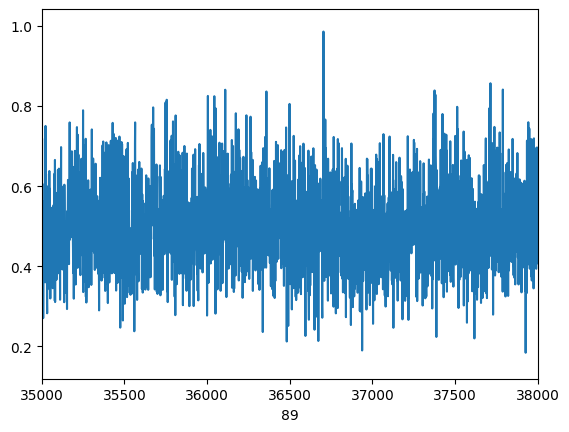

In [92]:
for key, item in rois_df[rois_df.in_Gamma & rois_df.is_VGAT].F_norm.items() :
    print(key)
    plt.figure()
    plt.plot(item)
    plt.xlim(35000, 38000)
    plt.xlabel(str(key))

[[<matplotlib.lines.Line2D at 0x1743272b050>],

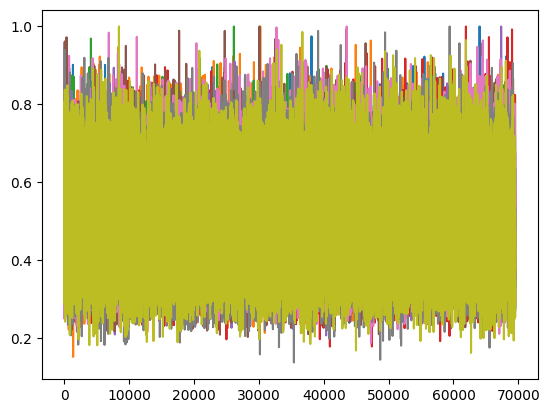

In [64]:
[plt.plot(item) for item in rois_df[rois_df.in_Gamma & rois_df.is_VGAT].F_norm]
#plt.xlim(10000, 20000)

In [11]:
neuropil_masks = pipelines.neuropil_mask.separation.generate(session, refresh = True)

LOAD_INFO : gen.neuropil_mask.separation      : <wm33/2023-12-20/001> Performing the computation to generate neuropil_mask.separation.all - 2024-01-24 19:06:13
INFO     : bi_mask_autoposition              : <wm33/2023-12-20/001> Starting mask separation - 2024-01-24 19:06:13


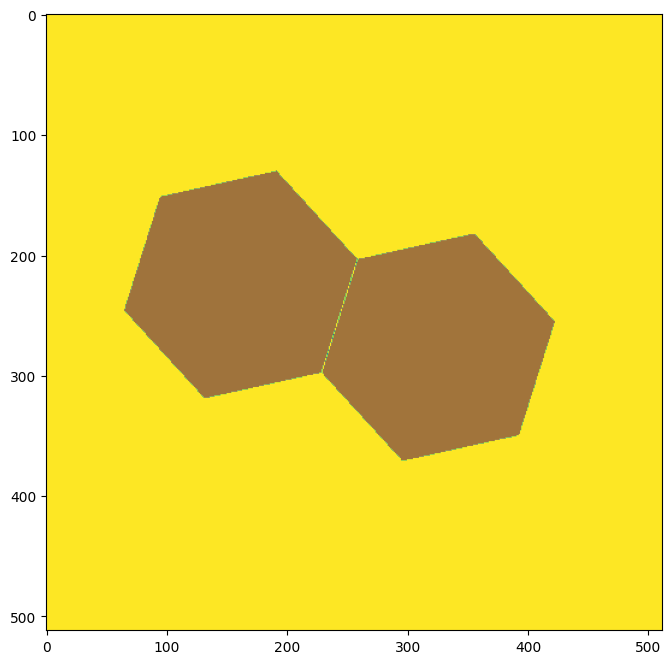

In [6]:
plt.subplots(figsize = (8,8))
plt.imshow(neuropil_masks["Gamma"]["refined_mask"])
plt.imshow(neuropil_masks["Delta"]["refined_mask"], alpha = 0.5)

In [269]:
from matplotlib.colors import Normalize
cmap_1 = plt.get_cmap("Blues")
cmap_2 = plt.get_cmap("YlOrBr")
vmax = 0.25
vmin = -0.05
min_alpha = 0.02
max_alpha = 0.15
norm = Normalize(vmin=vmin, vmax=vmax)

In [271]:
array_1 = neuropil_masks["Gamma"]["map_difference"]
array4D_1 = cmap_1(norm(array_1))
alpha = Inflow.signal.norms.normalize(array_1, min_val = min_alpha, max_val=max_alpha)
array4D_1[:,:,3] = alpha.clip(0,1)

In [272]:
array_2 = neuropil_masks["Delta"]["map_difference"]
array4D_2 = cmap_2(norm(array_2))
alpha =  Inflow.signal.norms.normalize(array_2, min_val = min_alpha, max_val=max_alpha)
array4D_2[:,:,3] = alpha.clip(0,1)

In [273]:
import pImage
img = pImage.transformations.automatic_brightness_and_contrast(suite2p_data['metadata']['meanImg'], clip_hist_percent = 1)

In [274]:
print(session.path)

\\cajal\cajal_data2\ONE\Adaptation\wm33\2023-12-20\001


In [3]:
adaptation.plots.show_roi_locations(session)

INFO     : show_roi_locations                : Making roi location plot for roi identities labels. - 2024-01-24 19:08:31


In [12]:
neuropil_masks["Gamma"]["polygon"]

array([[131.34822015,  64.4445107 ,  94.33404593, 191.12729059,
        258.03100004, 228.14146482, 131.34822015],
       [318.90895199, 245.76861492, 151.2581344 , 129.88799095,
        203.02832802, 297.53880854, 318.90895199]])

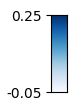

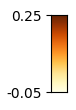

In [268]:
Inflow.plots.colors.cbar(cmap = "Blues", vmin = vmin, vmax = vmax)
Inflow.plots.utils.save_session_fig(plt.gcf(), "mapping_merge.cbar_greens", session_details = session)
Inflow.plots.colors.cbar(cmap = "YlOrBr", vmin = vmin, vmax = vmax)
Inflow.plots.utils.save_session_fig(plt.gcf(), "mapping_merge.cbar_reds", session_details = session)

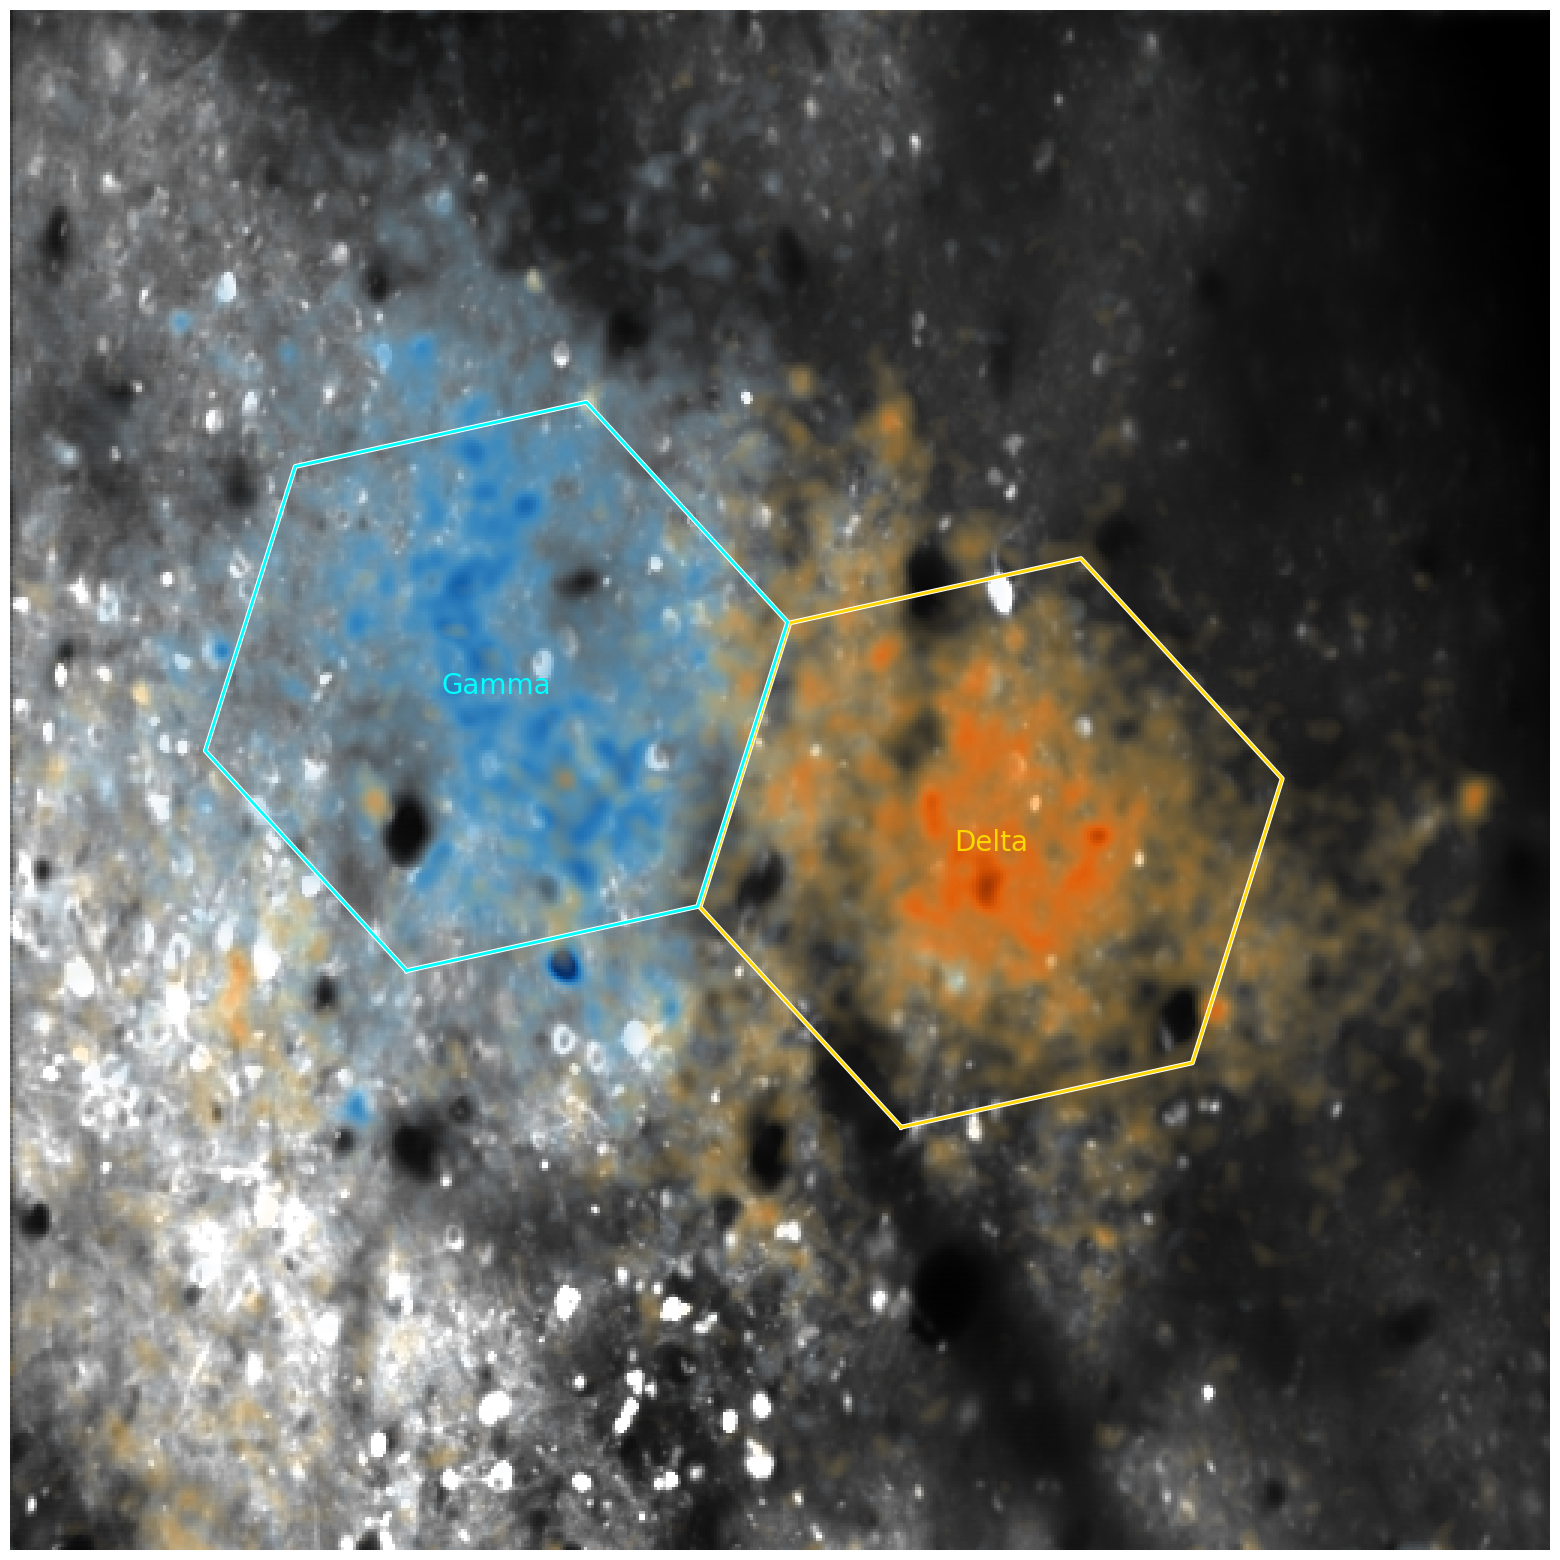

In [278]:
fig, ax = plt.subplots(figsize = (20,20))
plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)
im = plt.imshow(array4D_1)
plt.imshow(array4D_2)
cont = np.array(neuropil_masks["Delta"]["polygon"])
plt.plot(*cont, color = "white", linewidth = 3.5)
plt.plot(*cont, color = "gold", linewidth = 2)
cont = np.array(neuropil_masks["Gamma"]["polygon"])
plt.plot(*cont, color = "white", linewidth = 3.5)
plt.plot(*cont, color = "cyan", linewidth = 2)
center = neuropil_masks["Delta"]["barrel_center"].values()
plt.text(*center, "Delta", ha = "center", va = "center", color = "gold", fontsize = 20)
center = neuropil_masks["Gamma"]["barrel_center"].values()
plt.text(*center, "Gamma", ha = "center", va = "center", color = "cyan", fontsize = 20)
Inflow.plots.utils.clarify_image_ax(ax)
Inflow.plots.utils.save_session_fig(fig, "mapping_merge", session_details = session)